In [1]:
# from augment.util import *  # 문제 있음
from augment.augment_data import *
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np

/Users/imdohyeon/miniconda3/lib/python3.7/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def plot_features(original, augmented, sr):
    # Extract MFCCs for comparison
    mfcc_original = librosa.feature.mfcc(y=original, sr=sr, n_mfcc=13)
    mfcc_augmented = librosa.feature.mfcc(y=augmented, sr=sr, n_mfcc=13)
    
    # Plotting MFCCs using matplotlib
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(mfcc_original, aspect='auto', origin='lower', interpolation='none')
    plt.title('Original MFCC')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    
    plt.subplot(1, 2, 2)
    plt.imshow(mfcc_augmented, aspect='auto', origin='lower', interpolation='none')
    plt.title('Augmented MFCC')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    
    plt.tight_layout()
    plt.show()

In [3]:
wav_path = '/Users/imdohyeon/Documents/PythonWorkspace/Lieon-ai/dataset/train/data1.wav'
y, sr = librosa.load(wav_path, sr=44100)
tsf_and_addnoise = time_stretch(y, rate=1.3)
tsf_and_addnoise = add_noise(tsf_and_addnoise, noise_factor=0.025)

In [4]:
tss_and_addnoise = time_stretch(y, rate=0.7)
tss_and_addnoise = add_noise(tss_and_addnoise, noise_factor=0.05)

In [5]:
psh = pitch_shift(y, sr, n_steps=2)

In [7]:
psl = pitch_shift(y, sr, n_steps=-2)

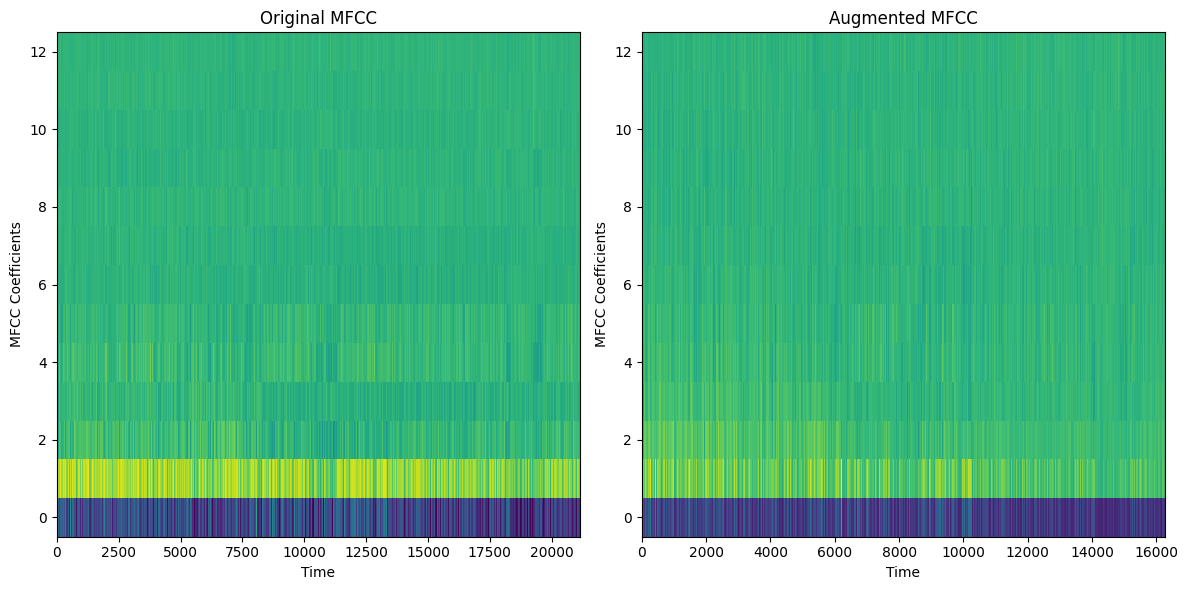

In [8]:
plot_features(y, tsf_and_addnoise, sr)

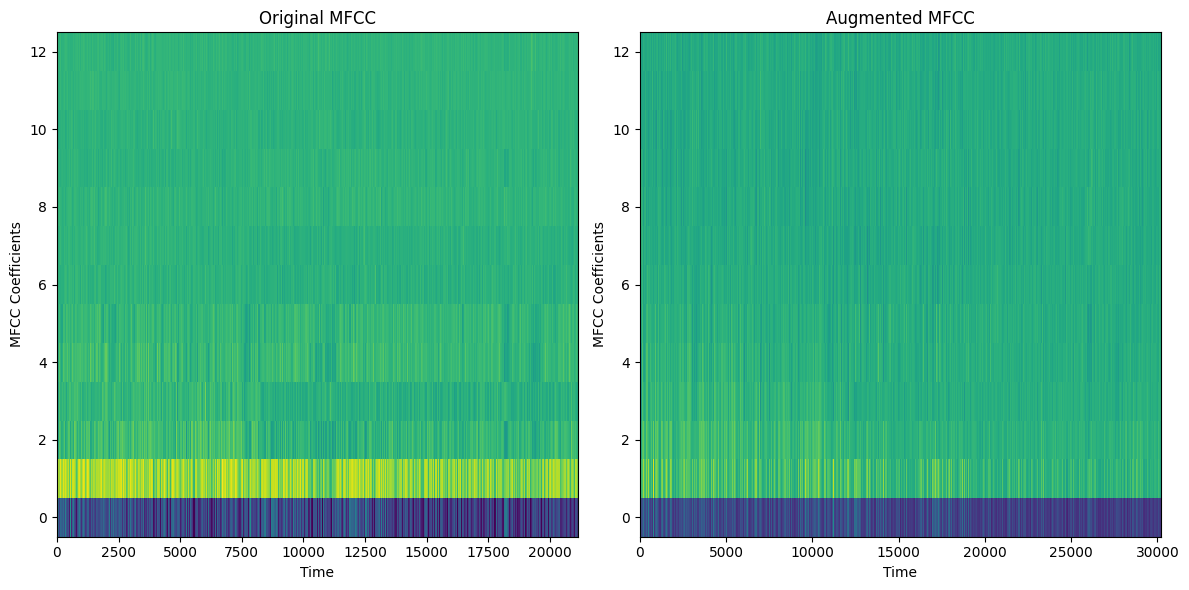

In [9]:
plot_features(y, tss_and_addnoise, sr)

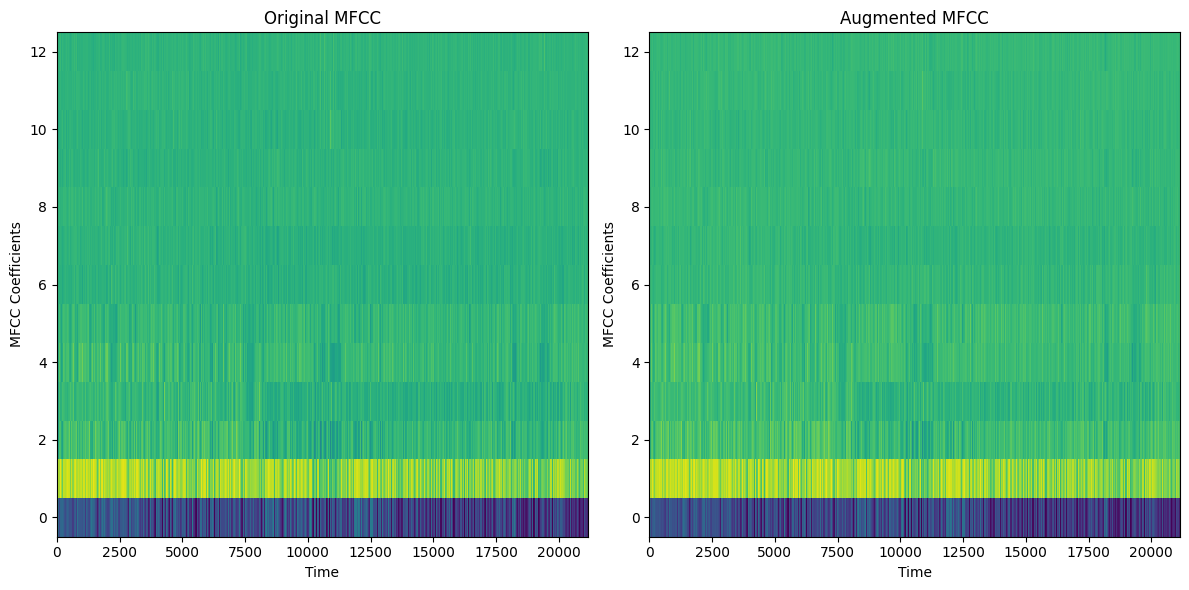

In [11]:
plot_features(y, psl, sr)

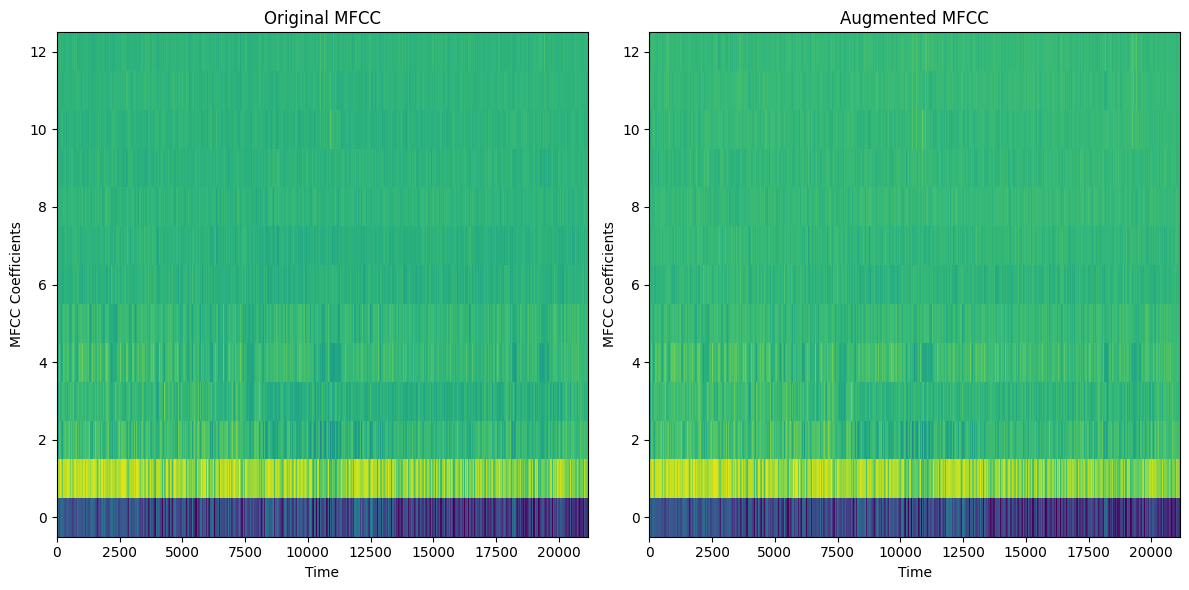

In [12]:
plot_features(y, psh, sr)

In [13]:
# Save augmented data
sf.write('/Users/imdohyeon/Documents/PythonWorkspace/Lieon-ai/dataset/augment/augment_1_data1.wav', tsf_and_addnoise, sr)
sf.write('/Users/imdohyeon/Documents/PythonWorkspace/Lieon-ai/dataset/augment/augment_2_data1.wav', tss_and_addnoise, sr)

In [15]:
sf.write('/Users/imdohyeon/Documents/PythonWorkspace/Lieon-ai/dataset/augment/augment_3_data1.wav', psh, sr)
sf.write('/Users/imdohyeon/Documents/PythonWorkspace/Lieon-ai/dataset/augment/augment_4_data1.wav', psl, sr)